#### Workflow for Building and Saving a Text Classification Model (using Navie Bayes)

Steps for classification
1. Prepare the data: Read in labelled data and preprocess the data
2. Split the data: Separate inputs and outputs into a training set and a test set
3. Numerically encode inputs: Using Count Vectorizer 
4. Fit a model: Fit a model on the training data and apply the fitted model to the test set
5. Evaluate the model: Decide how good the model is by calculating various error metrics
6. Save the model


#### Step 1: Prepare the data: Read in labelled data and preprocess the data

In [1]:
import pandas as pd
import re
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

In [2]:
# make sure the data is labeled


data = pd.read_csv('../assets/SMSSpamCollection.txt', encoding='utf-8' , sep='\t')
data.columns = ['label', 'text']
print(data.head()) # print function requires Python 3


  label                                               text
0   ham                      Ok lar... Joking wif u oni...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  U dun say so early hor... U c already then say...
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n...


In [3]:
# remove words with numbers, punctuation and capital letters

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
data['text'] = data.text.map(alphanumeric).map(punc_lower)
print(data.head())


  label                                               text
0   ham                      ok lar    joking wif u oni   
1  spam  free entry in   a wkly comp to win fa cup fina...
2   ham  u dun say so early hor    u c already then say   
3   ham  nah i don t think he goes to usf  he lives aro...
4  spam  freemsg hey there darling it s been   week s n...


#### Step 2. Split the data: Separate inputs and outputs into a training set and a test set

In [4]:
# split the data into inputs and outputs
X = data.text # inputs into model
Y = data.label # output of model


In [5]:
X.head()

0                        ok lar    joking wif u oni   
1    free entry in   a wkly comp to win fa cup fina...
2    u dun say so early hor    u c already then say   
3    nah i don t think he goes to usf  he lives aro...
4    freemsg hey there darling it s been   week s n...
Name: text, dtype: object

In [6]:
Y.head()

0     ham
1    spam
2     ham
3     ham
4    spam
Name: label, dtype: object

In [7]:
# split the data into a training and test set


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# test size = 30% of observations, which means training size = 70% of observations
# random state = 42, so we all get the same random train / test split

In [8]:
''' To see shape
X_train.head()
X_train.shape
y_train.head()
y_train.shape
'''

' To see shape\nX_train.head()\nX_train.shape\ny_train.head()\ny_train.shape\n'

In [9]:
X.shape

(5571,)

In [10]:


cv = CountVectorizer(stop_words='english', ngram_range=(1,1))

X_train_cv = cv.fit_transform(X_train) # fit_transform learns the vocab and one-hot encodes
X_test_cv  = cv.transform(X_test) # transform uses the same vocab and one-hot encodes

# print the dimensions of the training set (text messages, terms)
print(X_train_cv.toarray().shape)
print(X_test_cv.toarray().shape)

# Take note of the number of terms (6103). This will affect the operationlization

(3899, 6125)
(1672, 6125)


In [11]:
#print(X_test_cv)


#### 4. Fit a model: Fit a model on the training data and apply the fitted model to the test set


In [12]:
# Use a Naive Bayes model

nb = MultinomialNB()

# Train the model
nb.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data
y_pred_cv_nb = nb.predict(X_test_cv)
y_pred_cv_nb # The output is all of the predictions


array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

#### 5. Evaluate the model: Decide how good the model is by calculating various error metrics

Accuracy: 0.983
Precision: 0.944
Recall: 0.927
F1 Score: 0.935


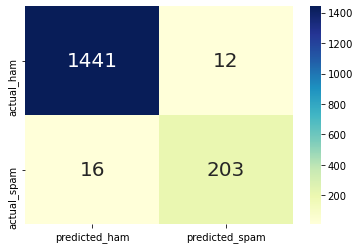

In [13]:

%matplotlib inline

cm = confusion_matrix(y_test, y_pred_cv_nb)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))


#### 6. Save the model

In [14]:
#We need to save the model for reloading in the deployed application.
#We also need to save the counter vectorizer in order to retain the vocabulary information

time = datetime.now().strftime("%Y-%m-%d")

classifier_path = '../outputs/nb_classifier-{}.pkl'.format(time)
countvectorizer_path = '../outputs/nb_countvectoriser-{}.pkl'.format(time)


with open(classifier_path, 'wb') as f1:
    pickle.dump(nb, f1)
    
with open(countvectorizer_path, 'wb') as f2:
    pickle.dump(cv, f2)
    

In [16]:
! ls -lt ../outputs

total 1400
-rw-r--r--  1 tanpohkeam  staff   74021 Jul  2 14:39 nb_countvectoriser-2021-07-02.pkl
-rw-r--r--  1 tanpohkeam  staff  196629 Jul  2 14:39 nb_classifier-2021-07-02.pkl
-rw-r--r--  1 tanpohkeam  staff   74021 Jul  2 10:57 countvectoriser-2021-07-02.pkl
-rw-r--r--  1 tanpohkeam  staff   49714 Jul  2 10:40 classifier-2021-07-02.pkl
-rw-r--r--  1 tanpohkeam  staff   74021 Jul  1 21:52 countvectoriser-2021-07-01.pkl
-rw-r--r--  1 tanpohkeam  staff   49714 Jul  1 21:52 classifier-2021-07-01.pkl
